#Topic modeling for articles title

In [3]:
import pandas as pd

data = pd.read_csv('train.csv',engine='python')
data = data.TITLE.to_list()
data[:5]

['Reconstructing Subject-Specific Effect Maps',
 'Rotation Invariance Neural Network',
 'Spherical polyharmonics and Poisson kernels for polyharmonic functions',
 'A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system',
 'Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants']

Предобработаем текст

In [4]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
nltk.download('punkt')
porter = PorterStemmer()
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


def text_preprocess(text):
  text = text.lower()
  text_p = "".join([char for char in text if char not in string.punctuation])
  words = word_tokenize(text_p)
  filtered_words = [word for word in words if word not in stop_words]
  stemmed = [porter.stem(word) for word in filtered_words]
  
  return stemmed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
data = [text_preprocess(text) for text in data]

In [6]:
data[:3]

[['reconstruct', 'subjectspecif', 'effect', 'map'],
 ['rotat', 'invari', 'neural', 'network'],
 ['spheric', 'polyharmon', 'poisson', 'kernel', 'polyharmon', 'function']]

## Bert

In [7]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 85.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

Тексты для берта надо склеить обратно.


In [8]:
def connect_data_for_bert(tokens):
  text = ''
  for token in tokens:
    text+=token+' '
  return text
data_bert = [connect_data_for_bert(text) for text in data]

In [9]:
data_bert[:3]

['reconstruct subjectspecif effect map ',
 'rotat invari neural network ',
 'spheric polyharmon poisson kernel polyharmon function ']

In [40]:
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', nr_topics =7)
headline_topics, _ = model.fit_transform(data_bert)

Batches:   0%|          | 0/656 [00:00<?, ?it/s]

2023-03-14 12:28:47,887 - BERTopic - Transformed documents to Embeddings
2023-03-14 12:29:09,289 - BERTopic - Reduced dimensionality
2023-03-14 12:29:13,578 - BERTopic - Clustered reduced embeddings
2023-03-14 12:29:19,874 - BERTopic - Reduced number of topics from 233 to 7


In [41]:
model.get_topic_info()

,Topic,Count,Name
0,-1,9182,-1_model_learn_network_use
1,0,11000,0_network_model_learn_gener
2,1,552,1_robot_commun_bandit_crowdsourc
3,2,134,2_brain_neuron_cancer_network
4,3,72,3_gan_color_graph_colour
5,4,21,4_industri_analysi_40_largescal
6,5,11,5_voltag_power_grid_low


In [42]:
model.get_document_info(data_bert)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,reconstruct subjectspecif effect map,-1,-1_model_learn_network_use,model - learn - network - use - system - estim...,0.000000,False
1,rotat invari neural network,0,0_network_model_learn_gener,network - model - learn - gener - neural - use...,0.785905,False
2,spheric polyharmon poisson kernel polyharmon f...,-1,-1_model_learn_network_use,model - learn - network - use - system - estim...,0.000000,False
3,finit element approxim stochast maxwelllandaul...,-1,-1_model_learn_network_use,model - learn - network - use - system - estim...,0.000000,False
4,compar studi discret wavelet transform wavelet...,0,0_network_model_learn_gener,network - model - learn - gener - neural - use...,1.000000,False
...,...,...,...,...,...,...
20967,contemporari machin learn guid practition phys...,0,0_network_model_learn_gener,network - model - learn - gener - neural - use...,0.639164,False
20968,uniform diamond coat wcco hard alloy cut inser...,0,0_network_model_learn_gener,network - model - learn - gener - neural - use...,1.000000,False
20969,analys soccer game cluster conceptor,0,0_network_model_learn_gener,network - model - learn - gener - neural - use...,1.000000,False
20970,effici simul lefttail sum correl lognorm variat,-1,-1_model_learn_network_use,model - learn - network - use - system - estim...,0.000000,False


In [43]:
type(model.get_topic_info())

pandas.core.frame.DataFrame

In [54]:
def myCoherence(data_bert, topic_words):
   tokenized = [list(tokenize(doc)) for doc in data_bert]
   id2word = corpora.Dictionary(tokenized)
   corpus = [id2word.doc2bow(text) for text in tokenized]
   # make sure you grab the topic words from the topic model and convert them to a list
   coherence_model = CoherenceModel(topics= topic_words ,texts=tokenized   
               , corpus=corpus, dictionary=id2word, coherence='c_v', topn=50)  #Use top 50 words since Top2Vec gets top 50 words
   coherence = coherence_model.get_coherence()
   return coherence

topic_words = model.get_topic_info()
topic_words = topic_words.Name.to_list()
for i in range(len(topic_words)):
  topic_words[i]=topic_words[i].split('_')[1:]

topic_words.pop(5)

coherence=0  
for i in range(len(topic_words)):
  coherence += myCoherence(data_bert,topic_words)

print(f"Model Coherence is:{coherence/6}")

Model Coherence is:0.2968299323159125


#LDA

In [13]:
import gensim

tm_dictionary2 = gensim.corpora.Dictionary(data)
#tm_dictionary2.filter_extremes(no_above=0.1, no_below=4)
#tm_dictionary2.compactify()

corpus = [tm_dictionary2.doc2bow(text) for text in data]
lda = gensim.models.LdaMulticore(corpus, 
                                 num_topics = 6, # число топиков
                                 id2word=tm_dictionary2, 
                                 passes=10)


In [14]:
lda.print_topics()

[(0,
  '0.043*"network" + 0.039*"learn" + 0.020*"deep" + 0.018*"use" + 0.017*"neural" + 0.014*"model" + 0.010*"detect" + 0.009*"gener" + 0.009*"optim" + 0.008*"imag"'),
 (1,
  '0.014*"quantum" + 0.011*"model" + 0.011*"group" + 0.010*"topolog" + 0.007*"theori" + 0.006*"dark" + 0.006*"interact" + 0.006*"effect" + 0.006*"complex" + 0.006*"dynam"'),
 (2,
  '0.009*"data" + 0.008*"model" + 0.007*"optim" + 0.006*"dynam" + 0.006*"factor" + 0.006*"matrix" + 0.006*"system" + 0.006*"decomposit" + 0.006*"tensor" + 0.005*"use"'),
 (3,
  '0.013*"magnet" + 0.009*"dynam" + 0.008*"structur" + 0.008*"electron" + 0.008*"effect" + 0.008*"studi" + 0.007*"state" + 0.007*"phase" + 0.007*"transit" + 0.006*"energi"'),
 (4,
  '0.018*"equat" + 0.012*"problem" + 0.011*"space" + 0.011*"gener" + 0.010*"function" + 0.009*"oper" + 0.009*"bound" + 0.007*"system" + 0.007*"solut" + 0.006*"theorem"'),
 (5,
  '0.021*"model" + 0.017*"estim" + 0.012*"process" + 0.010*"analysi" + 0.009*"data" + 0.008*"stochast" + 0.008*"use"

In [15]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, texts= data, dictionary=tm_dictionary2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.2646382295224627


#NMF

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_features=1500, min_df=10, stop_words='english')
X = vectorizer.fit_transform(data_bert)
words = np.array(vectorizer.get_feature_names_out())

nmf = NMF(n_components=6, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))


Topic 1: languag,mixtur,linear,use,select,infer,data,bayesian,predict,model
Topic 2: predict,adversari,detect,train,use,recurr,convolut,deep,neural,network
Topic 3: onlin,featur,classif,transfer,use,represent,reinforc,machin,deep,learn
Topic 4: space,graph,structur,dynam,equat,function,use,data,estim,analysi
Topic 5: train,geometri,music,rel,net,test,function,theorem,adversari,gener
Topic 6: design,gradient,problem,bayesian,approach,distribut,stochast,algorithm,control,optim


In [39]:
def myCoherence(data_bert, topic_words):
   tokenized = [list(tokenize(doc)) for doc in data_bert]
   id2word = corpora.Dictionary(tokenized)
   corpus = [id2word.doc2bow(text) for text in tokenized]
   # make sure you grab the topic words from the topic model and convert them to a list
   coherence_model = CoherenceModel(topics= topic_words ,texts=tokenized   
               , corpus=corpus, dictionary=id2word, coherence='c_v', topn=50)  #Use top 50 words since Top2Vec gets top 50 words
   coherence = coherence_model.get_coherence()
   return coherence
  
coherence=0  
for i, topic in enumerate(H):
   coherence += myCoherence(data_bert,words[topic.argsort()[-10:]])
print(f"Model Coherence is:{coherence/6}")

Model Coherence is:0.39518017325457727


#Top2Vec

In [17]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


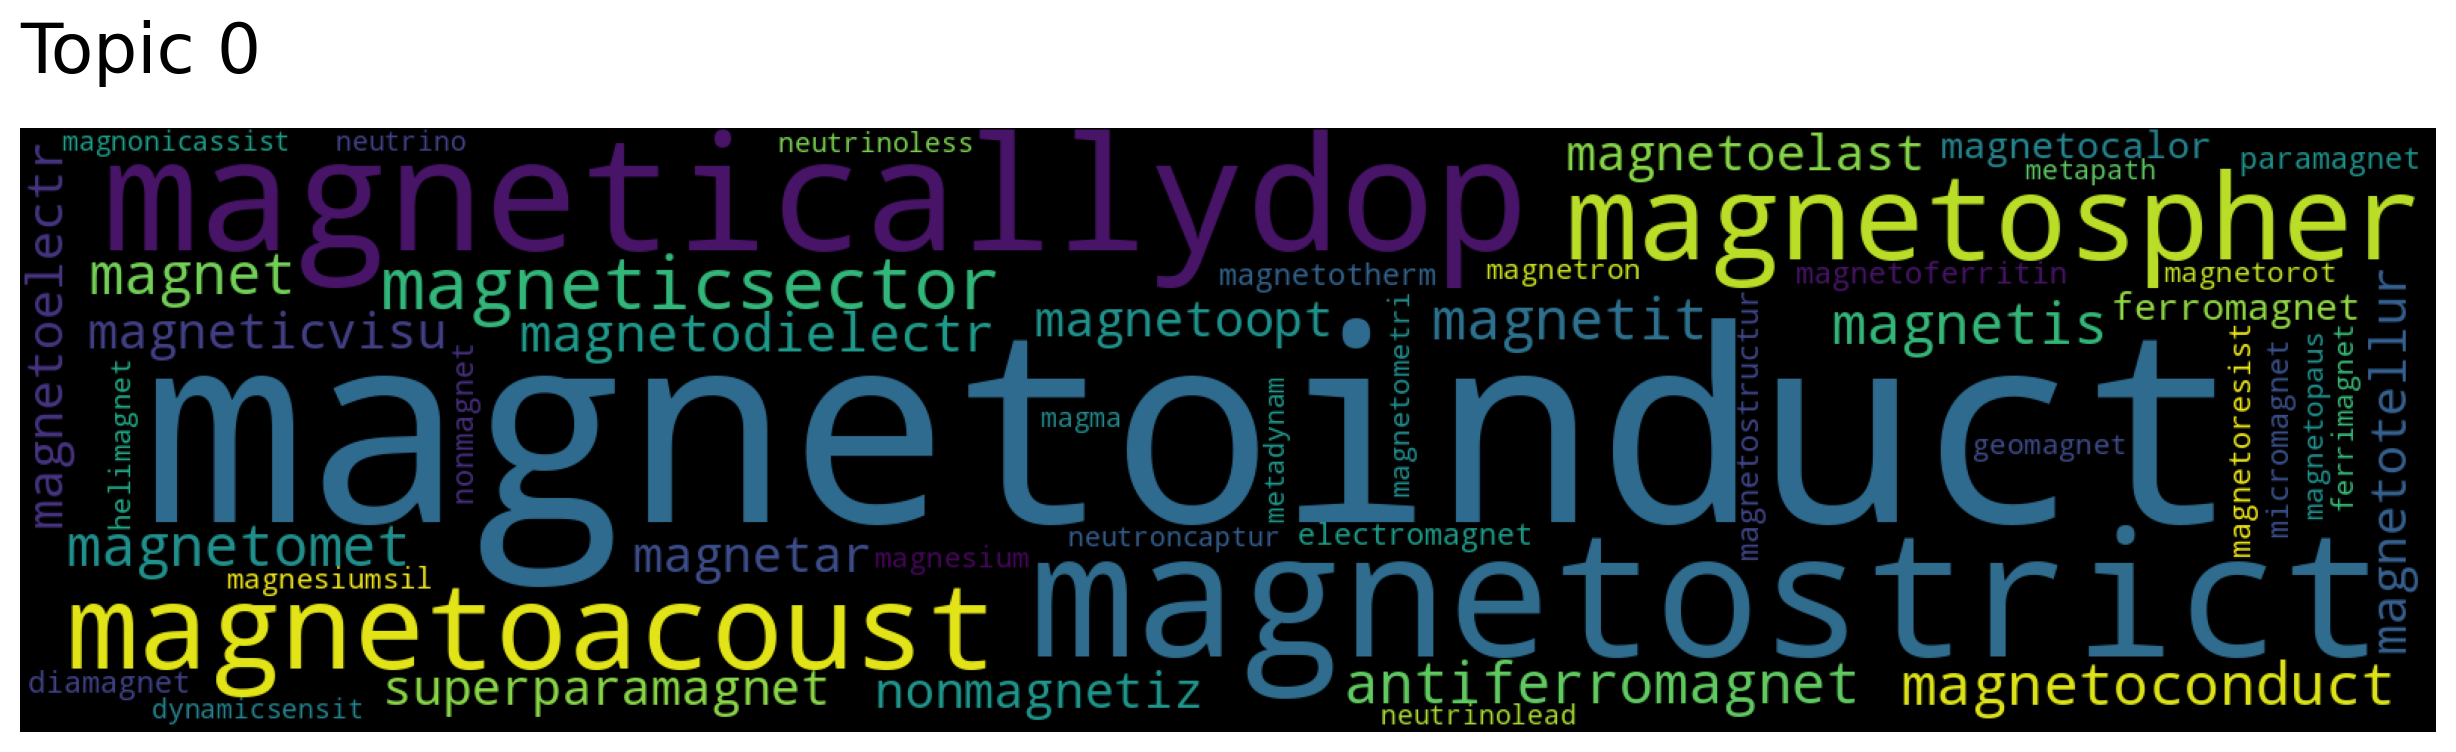

In [22]:
model.generate_topic_wordcloud(0)

In [19]:
model.hierarchical_topic_reduction(num_topics=6)
for i in range(6):
  print(model.topic_words_reduced[i])

['manifoldvalu' 'algorithminvari' 'discretemargin' 'variancestabil'
 'variancereduct' 'quasiarithmet' 'varianceprevari' 'submultitil'
 'variancereduc' 'multiparadigm' 'multiphasefield' 'subtomogram'
 'quasiintegr' 'integralmatch' 'multidirichlet' 'quasidetermin'
 'diversitysensit' 'exponentialtyp' 'manifold' 'quasigeostroph'
 'pseudorandom' 'multisymplect' 'paradigmshift' 'spectrumpreserv'
 'pseudoproven' 'quasihomogen' 'strictlycorrel' 'discretecontinu'
 'optimallyplac' 'overlapbas' 'clusteringratec' 'multinorm' 'subexponenti'
 'asynchronytoler' 'randomcoeffici' 'subhypergraph' 'phasecontrast'
 'learningtoinf' 'pathintegr' 'moderateconfid' 'quasipolynomi'
 'orbitaldepend' 'passivityshort' 'delayconstrain' 'intervaltyp'
 'multipermut' 'quasitriangular' 'multigrasp' 'implicitsolv'
 'randomnessinduc']
['spectrallynorm' 'ultraspheroid' 'orbitalact' 'neutroncaptur'
 'orbitalfre' 'orbitaldepend' 'neutrinolead' 'orbitalupd' 'astroparticl'
 'hyperpolariz' 'protoninduc' 'entropydegre' 'spectra

In [36]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel

def myCoherence(data_bert, topic_words):
   tokenized = [list(tokenize(doc)) for doc in data_bert]
   id2word = corpora.Dictionary(tokenized)
   corpus = [id2word.doc2bow(text) for text in tokenized]
   # make sure you grab the topic words from the topic model and convert them to a list
   coherence_model = CoherenceModel(topics= topic_words ,texts=tokenized   
               , corpus=corpus, dictionary=id2word, coherence='c_v', topn=50)  #Use top 50 words since Top2Vec gets top 50 words
   coherence = coherence_model.get_coherence()
   return coherence

coherence=0
for i in range(6):
  coherence+= myCoherence(data_bert, model.topic_words_reduced[i])
print(f"Model Coherence is:{coherence/6}")

Model Coherence is:0.5362703759272748


In [57]:
pd.DataFrame({"Model":['top2vec','NMF','Bertopic','LDA'],'Coherence':[0.5362703759272748,0.39518017325457727,0.2968299323159125,0.2646382295224627]})

,Model,Coherence
0,top2vec,0.536270
1,NMF,0.395180
2,Bertopic,0.296830
3,LDA,0.264638
